# Importing required Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

In [2]:
from scipy.stats import norm
from scipy import stats
from subprocess import check_output
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Importing the Flight Ticket  Dataset

In [3]:
df_train=pd.read_csv(r'c:\Users\Sony\Desktop\flight_trainset.csv')

In [5]:
df_test=pd.read_csv(r'c:\Users\Sony\Desktop\flight_testset.csv')

In [6]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


We have imported all the packages and libraries we will be using for the initial exploration of data. This notebook will be split into two major sections, majorly:

Exploration and Visualization using pandas and seaborn packages Building evaluating and tuning different regression models using scikit learn package

# 1. Data Exploration

In [8]:
#checking number of rows and columns
df_train.shape

(10683, 11)

In [9]:
df_test.shape

(2671, 10)

train dataset contains-10683 rows and 11 columns

test dataset contains -2671 rows and 10 columns

In [10]:
#checking the datatypes of each variable

df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
#train data information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Missing Values Detection

In [12]:
#count no of null values in each column
df_train.shape,df_train.isnull().sum()

((10683, 11), Airline            0
 Date_of_Journey    0
 Source             0
 Destination        0
 Route              1
 Dep_Time           0
 Arrival_Time       0
 Duration           0
 Total_Stops        1
 Additional_Info    0
 Price              0
 dtype: int64)

In [13]:
#only 1 records so can be drop that record
#drop null values
df_train=df_train.dropna(axis=0)
df_train.shape

(10682, 11)

In [14]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Statistical Summary of Dataset

In [15]:
#data description
#mean median std etc.
df_train.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# 2.Data Preparation/Data Cleaning for further analysis

In [16]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [17]:
#format date of journey
#day of travel
#month of travel
#year of travel is same so no need
#add extra column week day-- 1 means weekday, 0 means weekend

df_train['Day_of_Travel']=pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.day
df_test['Day_of_Travel']=pd.to_datetime(df_test.Date_of_Journey,format="%d/%m/%Y").dt.day

df_train['Month_of_Travel']=pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.month
df_test['Month_of_Travel']=pd.to_datetime(df_test.Date_of_Journey,format="%d/%m/%Y").dt.month

df_train['Weekday'] = ((pd.DatetimeIndex(df_train.Date_of_Journey).dayofweek) // 5 == 1).astype(int)
df_test['Weekday'] = ((pd.DatetimeIndex(df_test.Date_of_Journey).dayofweek) // 5 == 1).astype(int)

df_train=df_train.drop(columns=['Date_of_Journey'])
df_test=df_test.drop(columns=['Date_of_Journey'])

In [18]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,1
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,0
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,0


In [19]:
df_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Travel,Month_of_Travel,Weekday
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,0
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,12,5,0
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,0
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,21,5,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,0


In [20]:
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Travel',
       'Month_of_Travel', 'Weekday'],
      dtype='object')

In [21]:

#format journey time arrival and departure

#departure
df_train['Depart_Hour']=pd.to_datetime(df_train.Dep_Time).dt.hour
df_train['Depart_Minute']=pd.to_datetime(df_train.Dep_Time).dt.minute

df_test['Depart_Hour']=pd.to_datetime(df_test.Dep_Time).dt.hour
df_test['Depart_Minute']=pd.to_datetime(df_test.Dep_Time).dt.minute


df_train['Arrival_Hour']=pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train['Arrival_Minute']=pd.to_datetime(df_train.Arrival_Time).dt.minute

df_test['Arrival_Hour']=pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test['Arrival_Minute']=pd.to_datetime(df_test.Arrival_Time).dt.minute

df_train=df_train.drop(columns=['Dep_Time'])
df_test=df_test.drop(columns=['Dep_Time'])

df_train=df_train.drop(columns=['Arrival_Time'])
df_test=df_test.drop(columns=['Arrival_Time'])

In [22]:
#add extra two column wheter journey at night time or early morning time

#we have seen some flights have less fare at early morning and high price at late night so direct relation

df_train['Night_Journey']=(df_train['Depart_Hour']>=20).astype(int)
df_train['Early_Morning_Journey']=((df_train['Depart_Hour']>=4) & (df_train['Depart_Hour']<=8)).astype(int)

df_test['Night_Journey']=(df_train['Depart_Hour']>=20).astype(int)
df_test['Early_Morning_Journey']=((df_train['Depart_Hour']>=4) & (df_train['Depart_Hour']<=8)).astype(int)

In [23]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute,Night_Journey,Early_Morning_Journey
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,1,22,20,1,10,1,0
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,1,5,50,13,15,0,1
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,0,9,25,4,25,0,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,0,18,5,23,30,0,0
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,0,16,50,21,35,0,0


In [24]:
#Flight duration
#converting duration hour and minute into seprate columns
#function for training and test also

def extract_hour_minute(duration):
    hour=[]
    minute=[]

    for time in duration:
        minu=time.split(' ')
        count=len(minu)
        if count==2:
            h=minu[0].split('h')[0]
            hour.append(int(h))
            m=minu[1].split('m')[0]
            minute.append(int(m))
        elif minu[0][-1]=='m':
            hour.append(0)
            m=minu[0].split('m')[0]
            minute.append(int(m))
           #print(m)    
        elif minu[0][-1]=='h':
            minute.append(0)
            h=minu[0].split('h')[0]
            hour.append(int(h))
           #print(h)
    return hour,minute

In [25]:
#lets call function and add to new columns

df_train['Travel_Hour'],df_train['Travel_Minute']=extract_hour_minute(df_train['Duration'])
df_test['Travel_Hour'],df_test['Travel_Minute']=extract_hour_minute(df_test['Duration'])

df_train=df_train.drop(columns=['Duration'])
df_test=df_test.drop(columns=['Duration'])

In [26]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute,Night_Journey,Early_Morning_Journey,Travel_Hour,Travel_Minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,1,22,20,1,10,1,0,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,1,5,50,13,15,0,1,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,0,9,25,4,25,0,0,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,0,18,5,23,30,0,0,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,0,16,50,21,35,0,0,4,45


In [27]:
df_train.dtypes

Airline                  object
Source                   object
Destination              object
Route                    object
Total_Stops              object
Additional_Info          object
Price                     int64
Day_of_Travel             int64
Month_of_Travel           int64
Weekday                   int32
Depart_Hour               int64
Depart_Minute             int64
Arrival_Hour              int64
Arrival_Minute            int64
Night_Journey             int32
Early_Morning_Journey     int32
Travel_Hour               int64
Travel_Minute             int64
dtype: object

# 2.Data Visualization

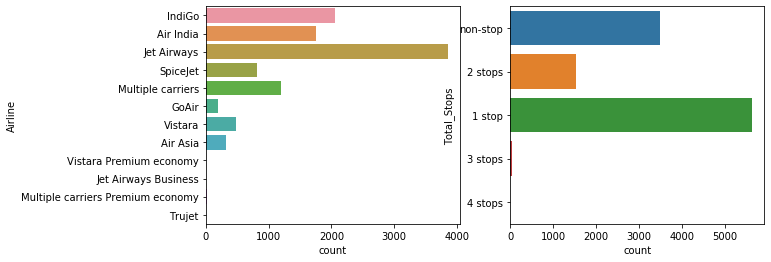

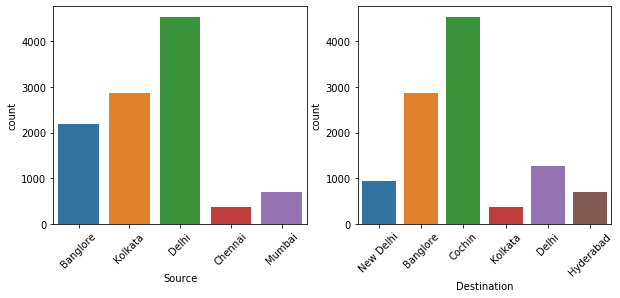

In [28]:
#categorical data visualization 

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(y=df_train['Airline'])
plt.subplot(1,2,2)
sns.countplot(y=df_train['Total_Stops'])
plt.show()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x=df_train['Source'])
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(x=df_train['Destination'])
plt.xticks(rotation=45)
plt.show()

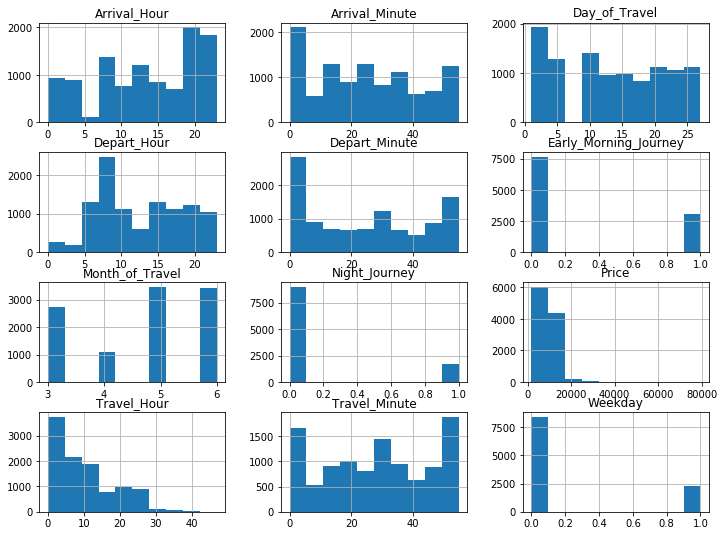

In [29]:
#histogram to check the data despersion

df_train.hist(figsize=(12,9))
plt.show()

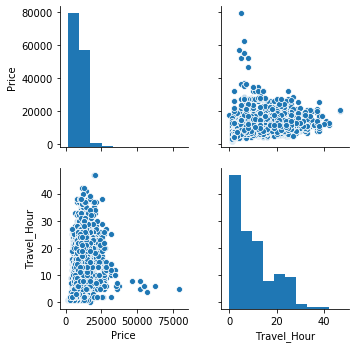

In [30]:
#check the price and travel hour pair plot
sns.pairplot(data=df_train,vars=['Price','Travel_Hour'])

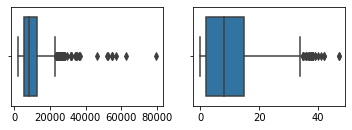

In [31]:
#box plot to find the outlier
plt.subplot(2,2,1)
sns.boxplot(x=['Price'],data=df_train)
plt.subplot(2,2,2)
sns.boxplot(x=['Travel_Hour'],data=df_train)

# ""outlier removal"" 

5277.0
12373.0
7096.0


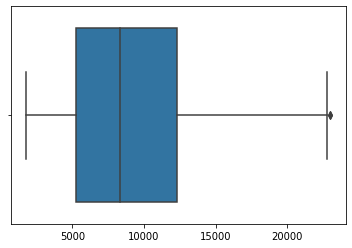

In [32]:

#price outlier check
Q1=df_train['Price'].quantile(0.25)
Q3=df_train['Price'].quantile(0.75)
IQR=Q3-Q1

print(Q1)
print(Q3)
print(IQR)

#price outlier removed
df_train=df_train[~((df_train['Price']>Q3+1.5*IQR)|(df_train['Price']<Q1-1.5*IQR))]
sns.boxplot(x=['Price'],data=df_train)

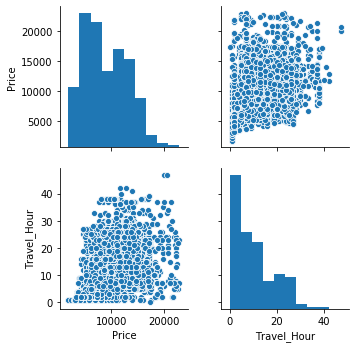

In [33]:
#check the price and travel hour pair plot
sns.pairplot(data=df_train,vars=['Price','Travel_Hour'])

In [35]:

#lets check any flight who has less travel minute and hour ==0
df_train[((df_train['Travel_Minute']<50) & (df_train['Travel_Hour']==0))]

#one record only five minutes travel from Mumbai to Hyderabad 
#impossible

#remove 
df_train=df_train[~((df_train['Travel_Minute']<50) & (df_train['Travel_Hour']==0))]
df_train[((df_train['Travel_Minute']<50) & (df_train['Travel_Hour']==0))]

#we are done with data preprocssig almost...
#label encoding remain to convert categorical column to unique int values

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute,Night_Journey,Early_Morning_Journey,Travel_Hour,Travel_Minute


In [36]:
df_train.dtypes

Airline                  object
Source                   object
Destination              object
Route                    object
Total_Stops              object
Additional_Info          object
Price                     int64
Day_of_Travel             int64
Month_of_Travel           int64
Weekday                   int32
Depart_Hour               int64
Depart_Minute             int64
Arrival_Hour              int64
Arrival_Minute            int64
Night_Journey             int32
Early_Morning_Journey     int32
Travel_Hour               int64
Travel_Minute             int64
dtype: object

In [37]:
df_test.dtypes

Airline                  object
Source                   object
Destination              object
Route                    object
Total_Stops              object
Additional_Info          object
Day_of_Travel             int64
Month_of_Travel           int64
Weekday                   int32
Depart_Hour               int64
Depart_Minute             int64
Arrival_Hour              int64
Arrival_Minute            int64
Night_Journey             int32
Early_Morning_Journey     int32
Travel_Hour               int64
Travel_Minute             int64
dtype: object

In [39]:
#get dummies of source and destination city

df_new=pd.concat([df_train.drop('Source',axis=1),pd.get_dummies(df_train['Source'],prefix='Source')],axis=1)
df_new=pd.concat([df_new.drop('Destination',axis=1),pd.get_dummies(df_new['Destination'],prefix='Destination')],axis=1)
df_train=df_new
df_train.head(5)

,Airline,Route,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,BLR ? DEL,non-stop,No info,3897,24,3,1,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,1,5,50,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,0,9,25,...,0,1,0,0,0,1,0,0,0,0
3,IndiGo,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,0,18,5,...,0,0,1,0,1,0,0,0,0,0
4,IndiGo,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,0,16,50,...,0,0,0,0,0,0,0,0,0,1


# Label Encoding

In [40]:
#columns Airline,Route,Total_Stops,Info can be encode 

df_train
df_test

#masking of object column
categorial_mask1=df_train.dtypes==object
categorial_mask2=df_test.dtypes==object

#categorical columns
categorical_cols1=df_train.columns[categorial_mask1].tolist()
categorical_cols2=df_test.columns[categorial_mask2].tolist()

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le2=LabelEncoder()

df_train[categorical_cols1]=df_train[categorical_cols1].apply(lambda col:le.fit_transform(col))
df_test[categorical_cols2]=df_test[categorical_cols2].apply(lambda col:le2.fit_transform(col))

In [41]:
df_train.head(5)

,Airline,Route,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3,18,4,5,3897,24,3,1,22,20,...,0,0,0,0,0,0,0,0,0,1
1,1,82,1,5,7662,1,5,1,5,50,...,0,0,1,0,1,0,0,0,0,0
2,4,116,1,5,13882,9,6,0,9,25,...,0,1,0,0,0,1,0,0,0,0
3,3,89,0,5,6218,12,5,0,18,5,...,0,0,1,0,1,0,0,0,0,0
4,3,29,0,5,13302,1,3,0,16,50,...,0,0,0,0,0,0,0,0,0,1


# Train-Test-Split

In [42]:
#feature extraction
X=df_train.drop(columns=['Price'])
y=df_train['Price']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8469, 26), (2118, 26), (8469,), (2118,))

# Model Selection!

# 1.Cross Validation function creation

In [43]:
#cross validation
from sklearn.model_selection import cross_val_score

#function declaration
def cross_validation(reg_model,X,y):
    
    score=cross_val_score(reg_model,X,y,scoring='neg_mean_squared_error',cv=10)
    rmse_score=np.sqrt(-score)
    print("\nScores ",rmse_score)
    print("Mean ",rmse_score.mean())
    print("Standard Deviation ",rmse_score.std())

# 2.Linear Regression with above function calling

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred_lr=reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

#cross validation function call
cross_validation(reg,X_train,y_train)
pd.DataFrame({'Price':y_test,'Price Predicted':y_pred_lr}).head(10)

1862.6253736030853

Scores  [2901.18075538 3011.74343201 2882.04246819 2823.77703486 2864.29265411
 2745.71557122 2937.18970598 3026.9077422  2796.65247059 2850.33750762]
Mean  2883.9839342152263
Standard Deviation  84.7169890117538


,Price,Price Predicted
7733,4145,5277.832443
3521,13817,12532.845048
4059,4823,5103.224160
8987,22270,11652.111396
10265,10231,10953.302857
1056,6144,4476.465433
1548,4649,9144.640182
9606,9709,9874.857823
6626,13377,11832.632237
8453,5241,9824.889689


# 2.SVR with above function calling

In [52]:
from sklearn.svm import SVR

reg=SVR(kernel='linear')
reg.fit(X_train,y_train)
y_pred_svr=reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

#cross validation function call
cross_validation(reg,X_train,y_train)
pd.DataFrame({'Price':y_test,'Price Predicted':y_pred_svr}).head(10)

1862.6253736030853

Scores  [3042.15928174 3165.81943386 2985.15039092 2971.37876634 2981.28329488
 2906.30460655 3103.76149509 3176.4024139  2912.71262997 2936.15721679]
Mean  3018.112953003768
Standard Deviation  94.73160621046486


,Price,Price Predicted
7733,4145,4716.643968
3521,13817,11147.517490
4059,4823,4545.384766
8987,22270,9594.603837
10265,10231,11362.199956
1056,6144,5216.418615
1548,4649,9141.382693
9606,9709,9069.085189
6626,13377,10353.246953
8453,5241,8115.785628


# 2.K Neighbors Regressor with above function calling

In [53]:
from sklearn.neighbors import KNeighborsRegressor

reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)
y_pred_kn=reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

#cross validation function call
cross_validation(reg,X_train,y_train)
pd.DataFrame({'Price':y_test,'Price Predicted':y_pred_kn}).head(10)

1862.6253736030853

Scores  [2149.71231085 2322.55993532 2096.19424571 2287.43743371 2179.25925023
 2021.34497438 2288.03731629 2304.1686434  2078.73510762 2062.09577357]
Mean  2178.954499106775
Standard Deviation  107.80251378444574


,Price,Price Predicted
7733,4145,4250.000000
3521,13817,12515.000000
4059,4823,5142.000000
8987,22270,12718.000000
10265,10231,10441.000000
1056,6144,6065.333333
1548,4649,4649.000000
9606,9709,9850.666667
6626,13377,11884.333333
8453,5241,6196.333333


# 3.Random Forest Regressor with above function calling

In [50]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor(n_estimators=100)
reg.fit(X_train,y_train)
y_pred_rfr=reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

#cross validation function call
cross_validation(reg,X_train,y_train)
pd.DataFrame({'Price':y_test,'Price Predicted':y_pred_rfr}).head(10)

1862.6253736030853

Scores  [1153.34448541 1198.8377768  1096.83476826 1124.14840131 1061.56108836
 1056.00052166 1286.16025196 1251.69720819 1022.48403975 1063.61634543]
Mean  1131.4684887153367
Standard Deviation  84.68690998264915


,Price,Price Predicted
7733,4145,4253.250000
3521,13817,13738.780000
4059,4823,4967.230000
8987,22270,20013.790000
10265,10231,10384.740000
1056,6144,5067.360000
1548,4649,4710.410000
9606,9709,8481.200000
6626,13377,9016.529333
8453,5241,6235.220000


# 4.Gradient Boosting Regressor with above function calling

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor(n_estimators=5,learning_rate=1,loss ='ls')
gbr.fit(X_train,y_train)
y_pred=gbr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

#cross validation function call
cross_validation(gbr,X_train,y_train)
pd.DataFrame({'Price':y_test,'Price Predicted':y_pred}).head(10)

1862.6253736030856

Scores  [1788.2628375  1924.05467504 1785.46426109 1857.09378612 1754.09714634
 1671.63438842 1814.28114961 1826.45774398 1790.59582328 1771.00740137]
Mean  1798.2949212733479
Standard Deviation  62.75907388168693


,Price,Price Predicted
7733,4145,4651.733220
3521,13817,13008.235332
4059,4823,4643.668032
8987,22270,14823.572489
10265,10231,11334.928460
1056,6144,5621.940032
1548,4649,8406.746267
9606,9709,6436.282820
6626,13377,10083.974300
8453,5241,8044.744908


# Saving the predicted values in csv file

In [54]:
y_pred= pd.DataFrame(y_pred, columns=['y_pred']).to_csv('Flight.csv')

# Saving the best Model as a pickle in a file

Gradient Boosting Model is giving minimum error.Hence it is the best model

In [56]:
from sklearn.externals import joblib

In [58]:
joblib.dump(gbr,'Flight.pkl')

['Flight.pkl']